In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # visualizing data
%matplotlib inline
import seaborn as sns

In [23]:
df = pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')

In [24]:
df.shape

(418, 14)

In [45]:
df.head()

,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Country,Profit
Week,,,,,,,,,,,,,
2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,USA,941.67
2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,USA,NaN
2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,USA,1142.87
2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,USA,NaN
2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,USA,NaN


# Cleaning the data

In [26]:
# Convert 'Payment ($)' column to numeric, removing any non-numeric characters
df['Payment ($)'] = df['Payment ($)'].replace('[\$,]', '', regex=True).astype(float)

In [27]:
# Convert 'Payment Date' column to datetime format
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

In [28]:
# Replace empty strings in 'Country' column with NaN
df['Country'] = df['Country'].replace('', np.nan)

In [29]:
# Fill NaN values in 'Country' column with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

In [30]:
# Remove rows with missing values in 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword', 'Currency' columns
df = df.dropna(subset=['Campaign', 'Ad group', 'Keyword type', 'Search Keyword', 'Currency'])


In [31]:
# Print the cleaned dataframe
print(df)

          Week                        Campaign  \
0   2021-01-25             EK_Generic_Swimming   
1   2021-01-25             EK_Generic_Swimming   
2   2021-01-25        EK_Generic_Quad-Tok_Yoga   
3   2021-01-25             EK_Generic_Swimming   
4   2021-01-25          EK_Generic_Swimming_UK   
..         ...                             ...   
413 2021-05-03             EK_Generic_Swimming   
414 2021-05-03        EK_Generic_Quad-Tok_Yoga   
415 2021-05-03  EK_Generic_Tri-Tok_Reservation   
416 2021-05-03     EK_Generic_Quad-Tok_Pilates   
417 2021-05-03     EK_Generic_Quad-Tok_Pilates   

                                     Ad group Keyword type  \
0               Pool_Reservation_System_Exact        Exact   
1                      Pool_Booking_App_Exact        Exact   
2          Yoga_Studio_Booking_Software_Broad        Broad   
3             Pool_Scheduling_Software_Phrase       Phrase   
4             Pool_Reservation_Software_Broad        Broad   
..                         

#  Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [32]:
# Set 'Date' column as the index
df.set_index('Payment Date', inplace=True)

In [33]:
# Resample the data to weekly and monthly intervals and aggregate the metrics
weekly_report = df.resample('W').agg({
    'Cost ($)': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment ($)': 'sum'
})


In [34]:
monthly_report = df.resample('M').agg({
    'Cost ($)': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment ($)': 'sum'
})


In [35]:
# Calculate Returns on Ad Spends (%) for both weekly and monthly reports
weekly_report['Returns %'] = (weekly_report['Payment ($)'] / weekly_report['Cost ($)']) * 100
monthly_report['Returns %'] = (monthly_report['Payment ($)'] / monthly_report['Cost ($)']) * 100


In [36]:
# Display the reports
print("Weekly Report:")
print(weekly_report)

Weekly Report:
              Cost ($)  Impressions  Clicks  Prospects  Payment ($)  \
Payment Date                                                          
2021-02-07       38.33           17       2          1        980.0   
2021-02-14        0.00            0       0          0          0.0   
2021-02-21       12.05           27       4          1        980.0   
2021-02-28        0.00            0       0          0          0.0   
2021-03-07       15.97           31       3          1       1788.0   
2021-03-14       45.13          154       4          1       1188.0   
2021-03-21        0.00            0       0          0          0.0   
2021-03-28        0.00            0       0          0          0.0   
2021-04-04       50.15           35      12          3       2388.0   
2021-04-11        0.00            0       0          0          0.0   
2021-04-18        0.00            0       0          0          0.0   
2021-04-25        0.00            0       0          0        

In [37]:
print("\nMonthly Report:")
print(monthly_report)


Monthly Report:
              Cost ($)  Impressions  Clicks  Prospects  Payment ($)  \
Payment Date                                                          
2021-02-28       50.38           44       6          2       1960.0   
2021-03-31       61.10          185       7          2       2976.0   
2021-04-30       92.41          274      17          4       3368.0   
2021-05-31       85.30          261      10          3       3576.0   

                Returns %  
Payment Date               
2021-02-28    3890.432711  
2021-03-31    4870.703764  
2021-04-30    3644.627205  
2021-05-31    4192.262603  


# Which is the most profitable channel

In [41]:
# Calculate the profit for each row by subtracting the 'Cost ($)' from the 'Payment ($)'
df['Profit'] = df['Payment ($)'] - df['Cost ($)']

# Group the data by 'Campaign' and calculate the total profit for each campaign
campaign_profit = df.groupby('Campaign')['Profit'].sum()

# Find the most profitable campaign
most_profitable_campaign = campaign_profit.idxmax()

# Display the result
print("The most profitable campaign is:", most_profitable_campaign)

The most profitable campaign is: EK_Generic_Tri-Tok_Reservation


# Which category/keyword is the most profitable

In [42]:
# Calculate the profit for each row by subtracting the 'Cost ($)' from the 'Payment ($)'
df['Profit'] = df['Payment ($)'] - df['Cost ($)']

# Group the data by 'Keyword' and calculate the total profit for each category/keyword
keyword_profit = df.groupby('Search Keyword')['Profit'].sum()

# Find the most profitable category/keyword
most_profitable_keyword = keyword_profit.idxmax()

# Display the result
print("The most profitable category/keyword is:", most_profitable_keyword)

The most profitable category/keyword is: reservation management system


# Look for insights by analyzing data points on time series graphs

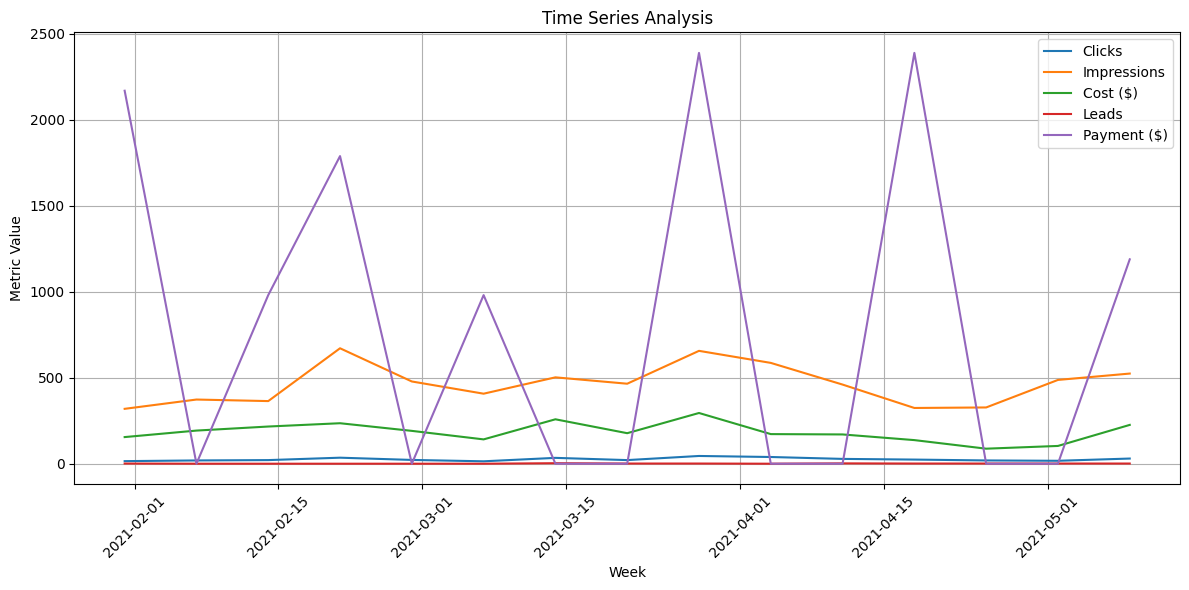

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in a pandas DataFrame named 'df'

# First, convert the 'Week' column to the appropriate datetime data type
df['Week'] = pd.to_datetime(df['Week'])

# Set 'Week' column as the index
df.set_index('Week', inplace=True)

# Extract relevant columns for time series analysis
time_series_columns = ['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Payment ($)']
time_series_data = df[time_series_columns]

# Resample the data to weekly intervals and calculate the sum for each week
weekly_data = time_series_data.resample('W').sum()

# Plot the time series line graphs
plt.figure(figsize=(12, 6))
for column in time_series_columns:
    plt.plot(weekly_data.index, weekly_data[column], label=column)

plt.xlabel('Week')
plt.ylabel('Metric Value')
plt.title('Time Series Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Analyse the Impact of geography

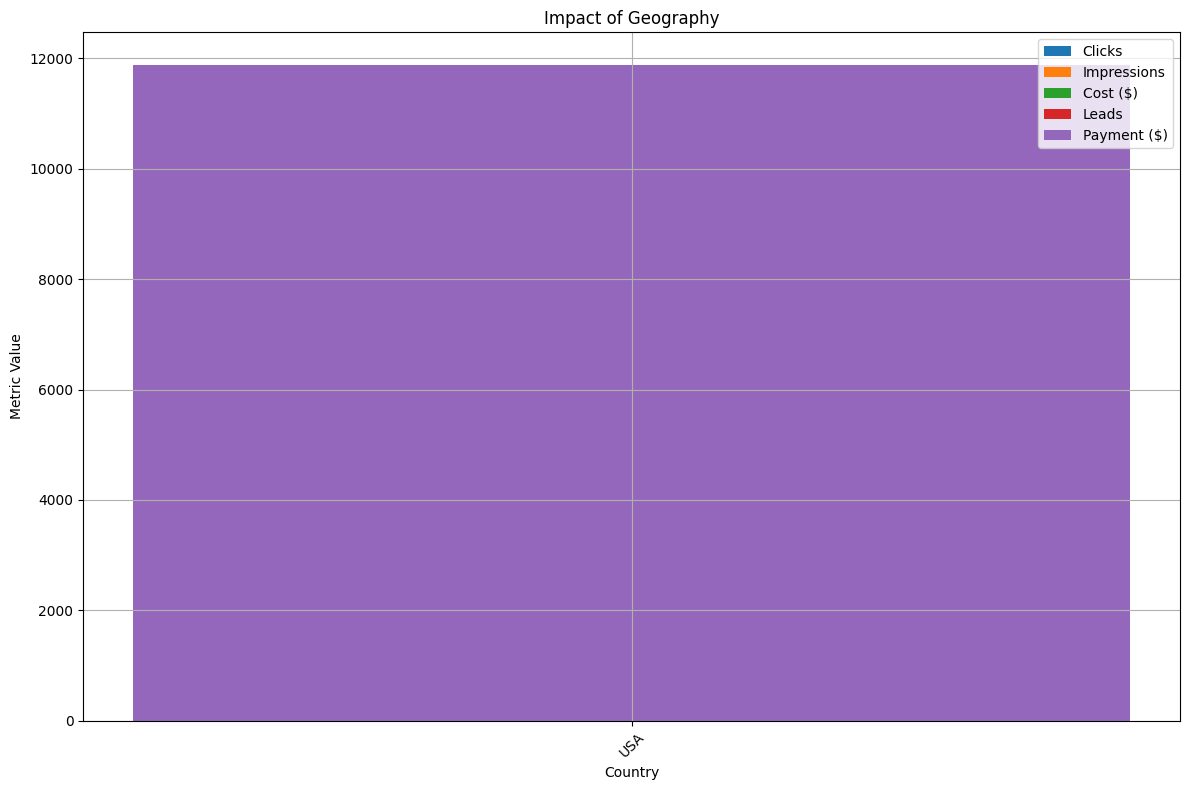

In [20]:
# Group the data by 'Country' and calculate the sum of metrics for each country
country_metrics = df.groupby('Country').sum()

# List of metrics to analyze
metrics_to_analyze = ['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Payment ($)']

# Plot bar graphs for each metric
plt.figure(figsize=(12, 8))
for metric in metrics_to_analyze:
    plt.bar(country_metrics.index, country_metrics[metric], label=metric)

plt.xlabel('Country')
plt.ylabel('Metric Value')
plt.title('Impact of Geography')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
